/Users/honglei.wu/Desktop/机器学习/code/dh_ai/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/honglei.wu/Desktop/机器学习/code/dh_ai/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


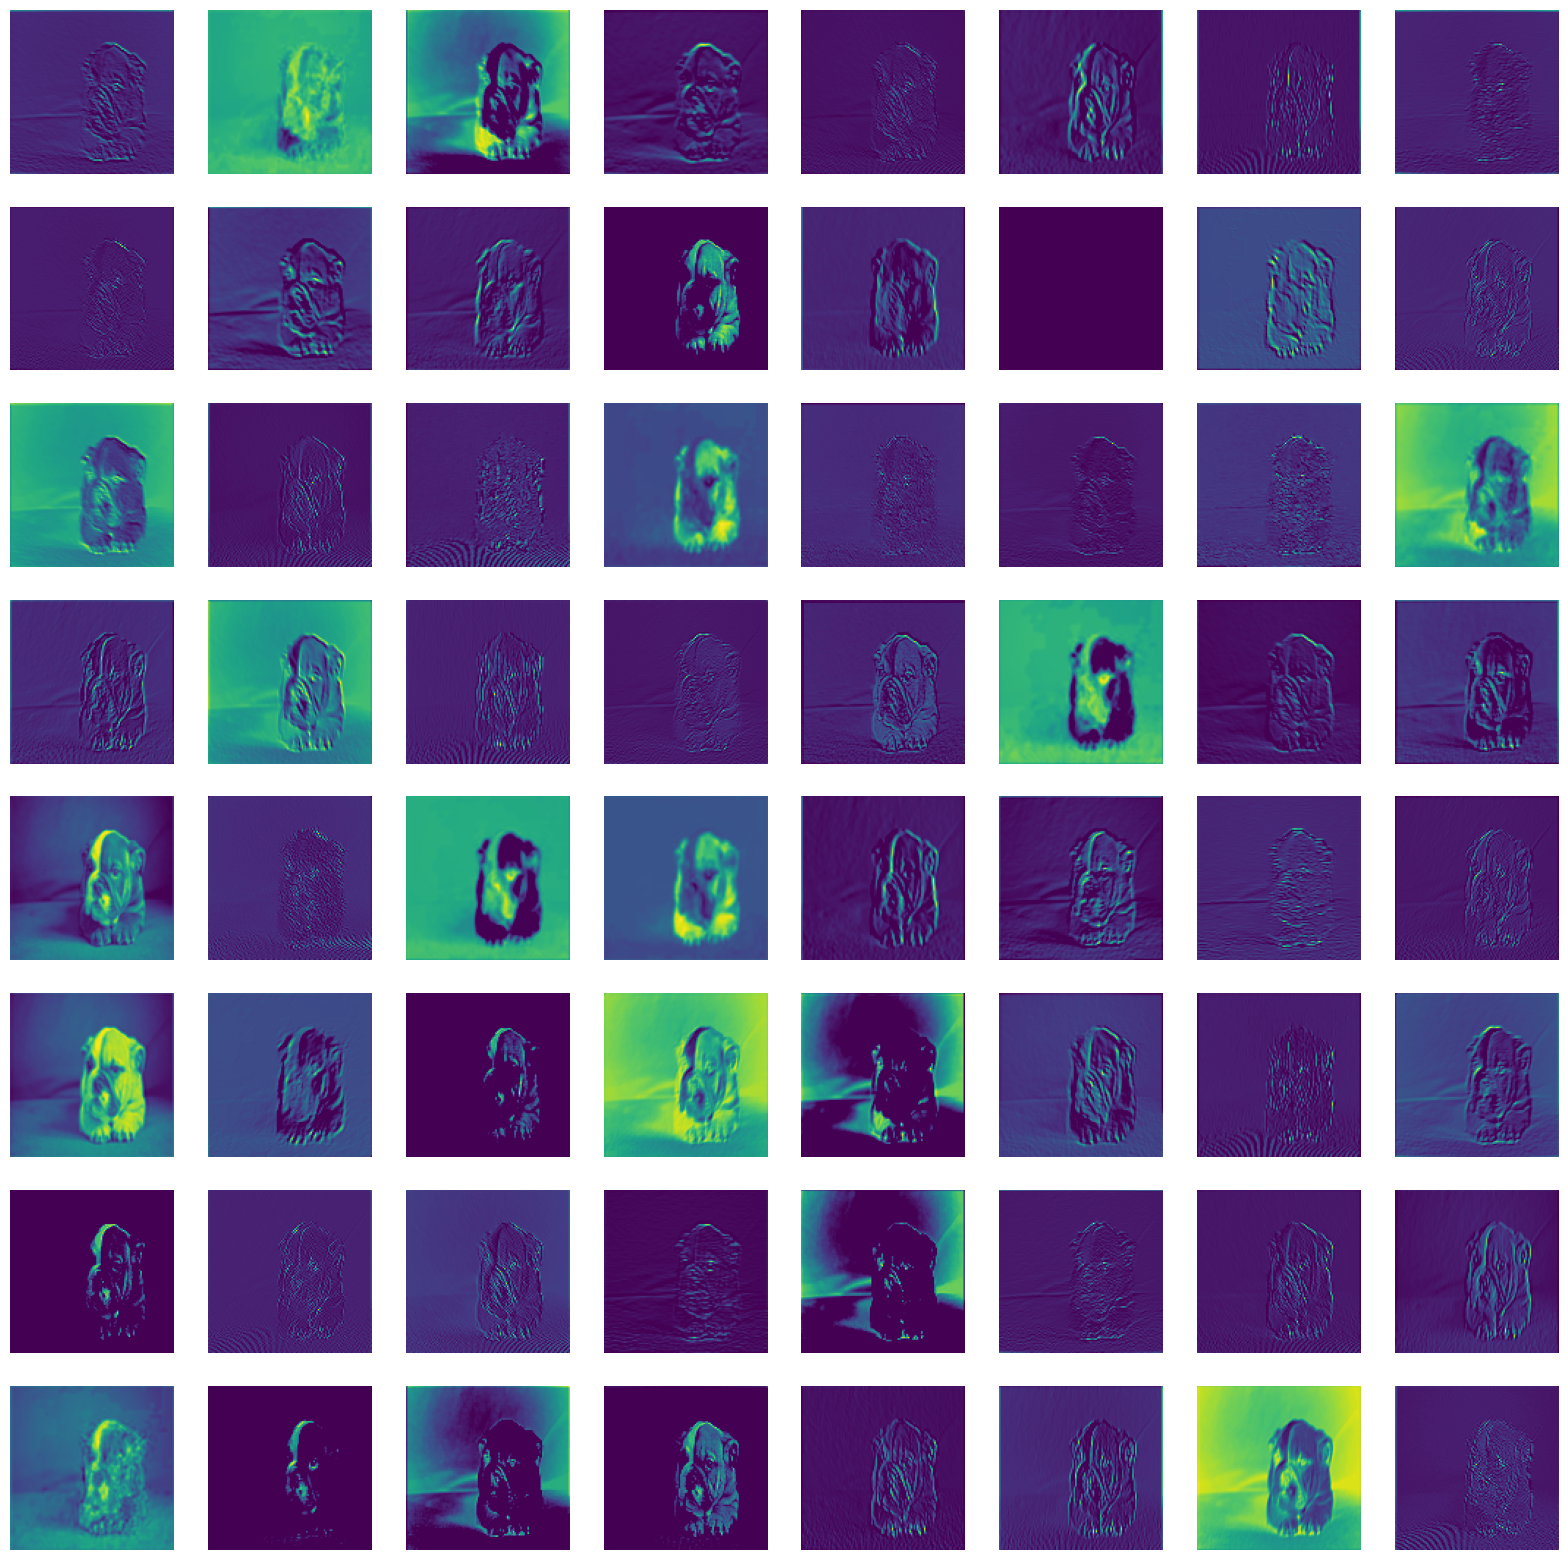

In [1]:
import torch
from torchvision.models import resnet50
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


def visualize_feature_maps(model, input_image, layer_name):
    model.eval()
    # 提取指定层的特征图

    feature_extractor = torch.nn.Sequential(
        *list(model.children())[:layer_name])
    feature_maps = feature_extractor(input_image).squeeze(0)

    # 可视化特征图
    num_feature_maps = feature_maps.shape[0]
    plt.figure(figsize=(20, 20))
    for i in range(num_feature_maps):
        plt.subplot(8, 8, i+1)
        plt.imshow(feature_maps[i].detach().numpy(), cmap='viridis')
        plt.axis('off')

    plt.show()


# 加载预训练的 ResNet 模型
model = resnet50(pretrained=True)
img = Image.open('./dog.jpg')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image = preprocess(img).unsqueeze(0)
visualize_feature_maps(model, input_image, layer_name=3)

In [12]:
list(model.children())[4]

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke